In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

### Comentarios

Se define una función "Sech_teorica que describe la solución solitonica y otra "Sech_disper" que describe las soluciones dispersivas. El codigo carga los csv y genera las soluciones teoricas que fueron posibles, ya que para el caso dispersivo no se pudo obtener las soluciones deseadas razón que nos lleva a replantear la manera como se está mdolando teoricamente. Por otro lado todas las soluciones coincidieron con las simulaciones obtenidas de los articulos de referencia. 

Luego de cargados, tambien se grafican utlizando matplotlib apra generar imagenes tridimensionales.

In [3]:


def sech_teorica(x,t,r):
    A=np.sqrt(2*a/gamma)
    omega=np.sqrt(-2*a/beta)
    Y1=A/np.cosh(omega*(c*t-x))
    Y2=np.exp(1j*r*((-c/beta)*x))
    return Y1*Y2
#(a+(c**2)/(2*beta))*t)
def sech(x):
    phi = np.sqrt(2 * a / gamma) * 1/np.cosh(np.sqrt(2 * a / gamma) * x);
    return phi


In [4]:
%cd Proyecto/
#%ls
"""for index in range(df.shape[1]):
    print('Índice de la columna: ', index)
    print('Contenido de la columna: ', df.iloc[: , index].values)"""

C:\Users\Acer\Documents\Yo\Universidad\SEMESTRE\Semestre_9\Parcial3-master\Proyecto


"for index in range(df.shape[1]):\n    print('Índice de la columna: ', index)\n    print('Contenido de la columna: ', df.iloc[: , index].values)"

In [8]:
%cd Proyecto

[WinError 2] El sistema no puede encontrar el archivo especificado: 'Proyecto'
C:\Users\Acer\Documents\Yo\Universidad\SEMESTRE\Semestre_9\Parcial3-master\Proyecto


# Simulacion 1

## Cargar datos númericos

In [5]:
df=pd.read_csv("One Soliton_new.csv",skiprows=0,on_bad_lines='skip')
#display(df)
#landa=df["Wavelength(A)"]
#landa=landa.to_numpy()

Sol_sim=[]
a=0
for column in df:
    array=df[column].to_numpy()
    Sol_sim.append(array)
    
Sol_sim=[]
    
for index in range(2000):
    #print('Índice de la columna: ', index)
    #print('Contenido de la columna: ', df.iloc[: , index].values)
    array=df.iloc[: , index].values
    Sol_sim.append(array)

In [6]:
Y1=[];X1=[]
for i in range(2000):
    #print(i)
    
    new=Sol_sim[i]
    Y1.append(np.array(X1,dtype="complex"))
    X1=[]
    #new=new.astype(complex)
    for j in range(len(new)):
        #print(Sol_sim[i][j])
        #print(i,j)
        
        
        a=Sol_sim[i][j]
        a=a.replace("i","j")
        a=a.replace(" ","")
        a=complex(a)
        X1.append(a)
Y1=np.array(Y1[1:len(Y1)],dtype="complex")
I1=np.abs(Y1.T)**2

## Cargar datos númericos

In [7]:
a = 1;
c = 1;
beta = -1;
gamma = 2./3;

T=np.linspace(0,50,len(Y1[0]))
x=np.linspace(-30,70,len(Y1))
Y_SOL=[]
for i in range(len(T)):
    Y_SOL.append(sech_teorica(x,T[i],1))

Y_SOL=np.array(Y_SOL,dtype="complex")
I_SOL=np.abs(Y_SOL)**2


## Graficación

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


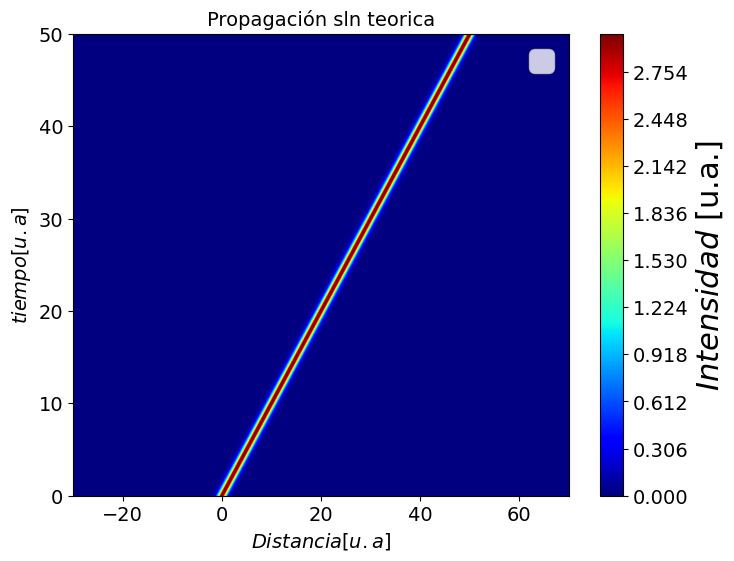

In [107]:
%matplotlib inline
Y=T
X=x
X,Y = np.meshgrid(X,Y)
Z=I_SOL
plt.rcParams['figure.figsize'] = 8, 6 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.rcParams['font.size'] = '22'

font = {'weight' : 'bold',
        'size'   : 14}
plt.figure()#im=plt.contourf(T1, T2, Landa,900,cmap="jet")

plt.title(" Propagación sln teorica ",fontsize=14)
plt.xlabel("$ Distancia [u.a]$",fontsize=14)
plt.ylabel("$ tiempo [u.a]$",fontsize=14)

cs=plt.contourf(X, Y, Z,500,cmap="jet")
plt.colorbar(cs,label="$Intensidad$ [u.a.]")

plt.legend()
#plt.savefig("Delta_landa_correc"+str(p))
#c = plt.colorbar()
#fig.colorbar(min(Power),max(Power),

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


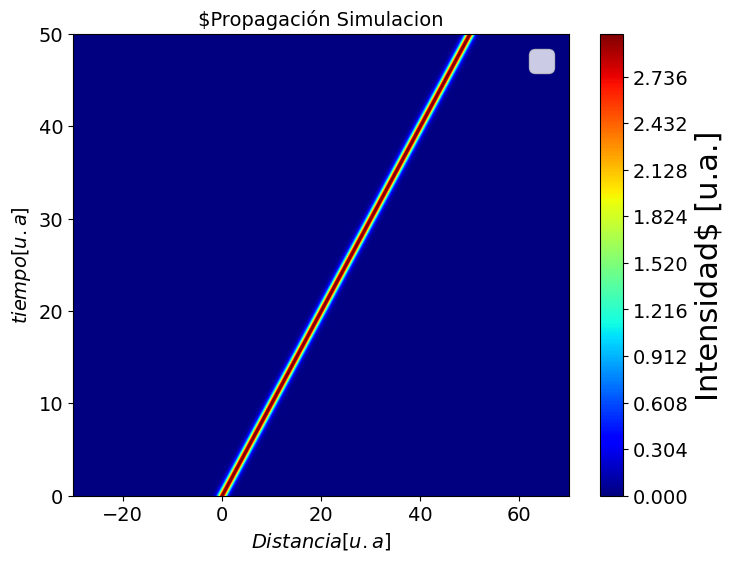

In [108]:
%matplotlib inline
Y=T
X=x
X,Y = np.meshgrid(X,Y)
Z2=I1
plt.rcParams['figure.figsize'] = 8, 6 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.rcParams['font.size'] = '22'

font = {'weight' : 'bold',
        'size'   : 14}
plt.figure()#im=plt.contourf(T1, T2, Landa,900,cmap="jet")

plt.title(" $Propagación Simulacion ",fontsize=14)
plt.xlabel("$ Distancia [u.a]$",fontsize=14)
plt.ylabel("$ tiempo [u.a]$",fontsize=14)

cs2=plt.contourf(X, Y, Z2,500,cmap="jet")
plt.colorbar(cs2,label="Intensidad$ [u.a.]")

plt.legend()
#plt.savefig("Delta_landa_correc"+str(p))
#c = plt.colorbar()
#fig.colorbar(min(Power),max(Power),



Text(0.5, 0, 'Error relativo %')

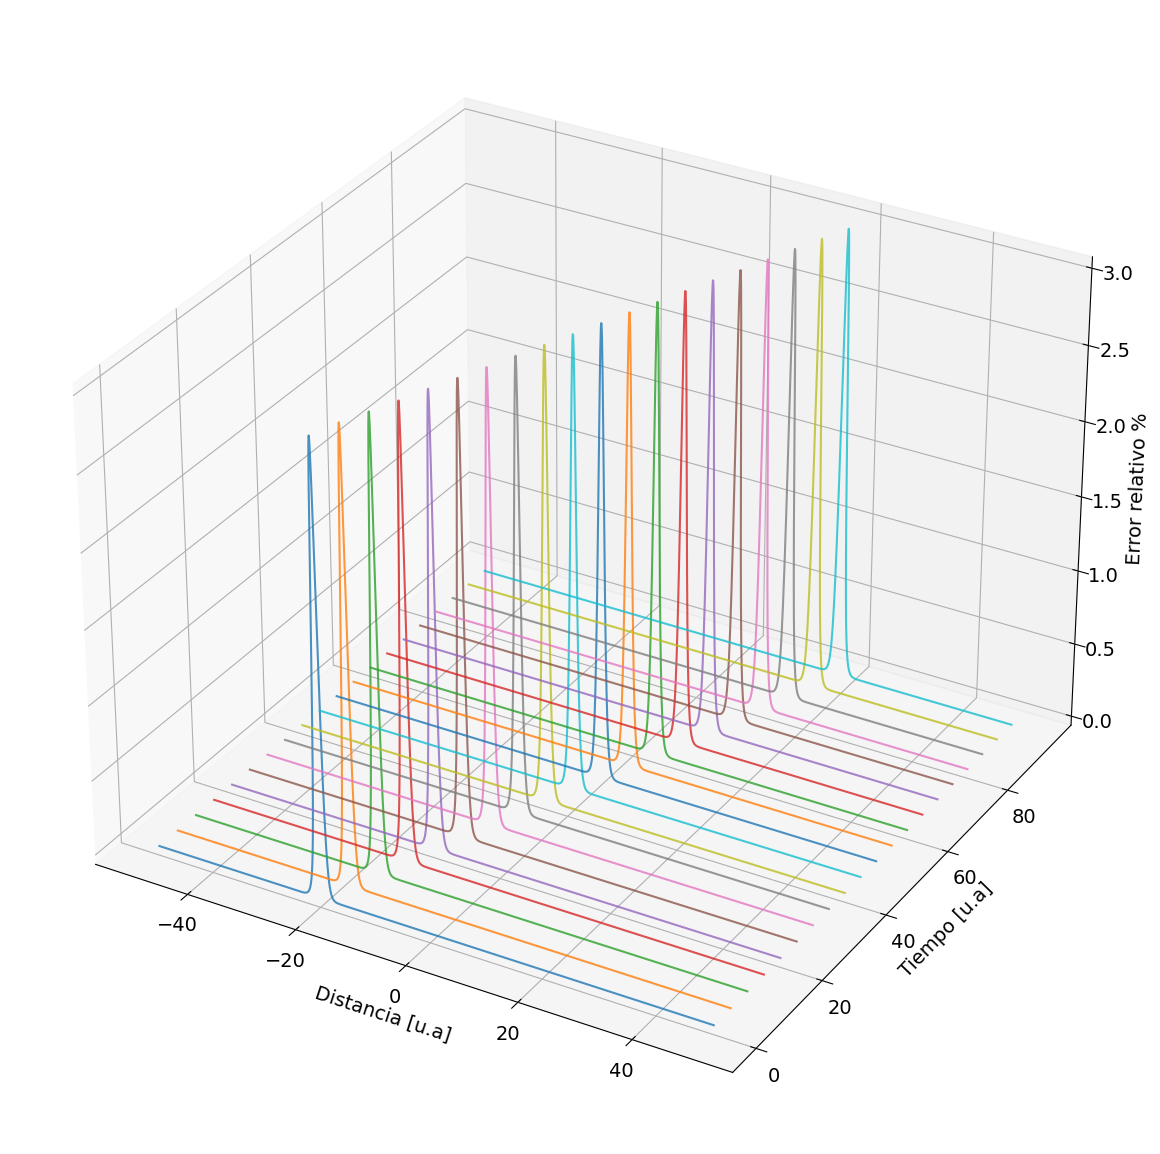

In [76]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = {'weight' : 'bold',
        'size'   : 24}

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

#fig.suptitle('Horizontally stacked subplots')
for i in range(0,2000,100):
    ax1.plot(x, (I1[i]), T[i], zdir='y', alpha=0.8)
    fig.tight_layout()

ax1.set_xlabel("Distancia [u.a]",fontsize=14)
ax1.set_ylabel("Tiempo [u.a]",fontsize=14)
ax1.set_zlabel("Error relativo %",fontsize=14)




## ERROR

In [64]:
def error(y_teoric,y_numeric):
    suma=0
    
    for i in range(len(y_teoric)):
        dif= y_teoric[i]-y_numeric[i]

        valor=(abs(dif)**2)/len(y_teoric)
        suma=suma+valor
    return suma

In [78]:
%ls%matplotlib inline
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = {'weight' : 'bold',
        'size'   : 24}

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

#fig.suptitle('Horizontally stacked subplots')
for i in range(0,2000,100):
    ax1.plot(x, 100*(I_SOL[i]-I1[i])/np.max(I1[i]), T[i], zdir='y', alpha=0.8)
    fig.tight_layout()

ax1.set_xlabel("Distancia [u.a]",fontsize=14)
ax1.set_ylabel("Tiempo [u.a]",fontsize=14)
ax1.set_zlabel("Error relativo %",fontsize=14)


UsageError: Line magic function `%ls%matplotlib` not found.


# Simulacion 2, Choque solitonico

## Soluciones

#### cargar datos numericos

In [9]:
df=pd.read_csv("One Soliton_11.csv",skiprows=0,on_bad_lines='skip')

Sol_sim=[]
a=0
    
Sol_sim=[]
    
for index in range(2000):
    #print('Índice de la columna: ', index)
    #print('Contenido de la columna: ', df.iloc[: , index].values)
    array=df.iloc[: , index].values
    Sol_sim.append(array)

Y1=[];X1=[]
for i in range(len(Sol_sim)):
    #print(i)
    
    new=Sol_sim[i]
    Y1.append(np.array(X1,dtype="complex"))
    X1=[]
    #new=new.astype(complex)
    for j in range(len(new)):
        #print(Sol_sim[i][j])
        #print(i,j)
        
        
        a=Sol_sim[i][j]
        a=a.replace("i","j")
        a=a.replace(" ","")
        a=complex(a)
        X1.append(a)

Y2=np.array(Y1[1:len(Y1)],dtype="complex")
I2=np.abs(Y2.T)

In [10]:
a = .2;
c = 1;
beta = -0.5
gamma = 2./3;
s=-a-(c**2)/(2*beta)
def sech_dispi(x,t):
    s=-a-(c**2)/(2*beta)
    #q=np.sqrt(4*s-gamma)
    #s_root=np.sqrt(s)
    #omeguita=2*np.sqrt(-s/(beta))
    #print(s)
    
    if s<0:
        
        s_root=1j*np.sqrt(-s)
        #print(s_root)
    else:
        s_root=np.sqrt(s)

    if 4*s-gamma<0:
        q=1j*np.sqrt(-(4*s-gamma))
        #print(q)
    else:
        q=np.sqrt(4*s-gamma)

    if (s/(beta))>0:
        omeguita=2j*np.sqrt(s/(beta))
    else:
        omeguita=2*np.sqrt(-s/(beta))

    
    return np.exp(1j*s*t)*1*s_root/(q+1*s_root*(np.cosh(omeguita*x)))

T=np.linspace(0,50,len(I2))
x=np.linspace(0,30,len(I2[0]))
Y_SOL2=[]
for i in range(len(T)):
    Y_SOL2.append(sech_teorica(x,T[i],1)+sech_teorica(x-30,T[i],-1))
Y_SOL2=np.array(Y_SOL2,dtype="complex")
I_SOL2=np.abs(Y_SOL2)**2

## Graficacion

### Graficación númerico

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


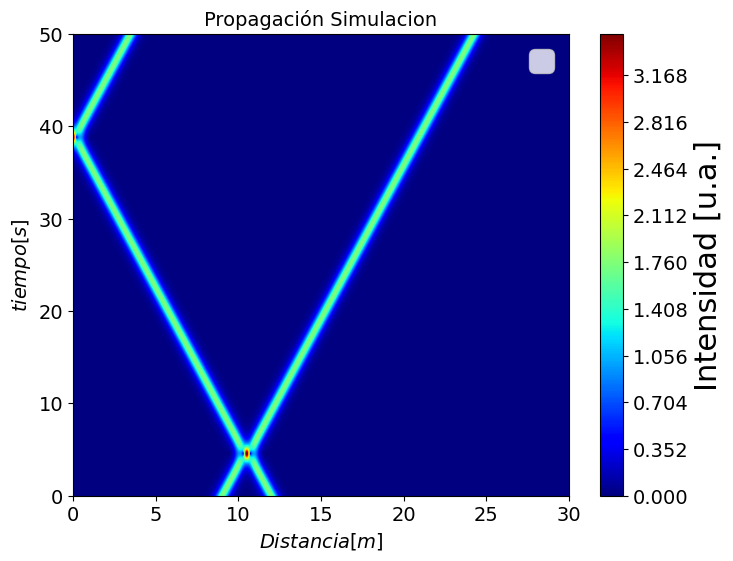

In [72]:
%matplotlib inline
Y=T
X=x
X,Y = np.meshgrid(X,Y)
Z2=I2
plt.rcParams['figure.figsize'] = 8, 6 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.rcParams['font.size'] = '22'

font = {'weight' : 'bold',
        'size'   : 14}
plt.figure()#im=plt.contourf(T1, T2, Landa,900,cmap="jet")

plt.title(" Propagación Simulacion ",fontsize=14)
plt.xlabel("$ Distancia [m]$",fontsize=14)
plt.ylabel("$ tiempo [s]$",fontsize=14)

cs2=plt.contourf(X, Y, Z2,500,cmap="jet")
plt.colorbar(cs2,label="Intensidad [u.a.]")

plt.legend()
#plt.savefig("Delta_landa_correc"+str(p))
#c = plt.colorbar()
#fig.colorbar(min(Power),max(Power),



### Vista 3D

In [12]:
%matplotlib qt
Y=T
X=x
X,Y = np.meshgrid(X,Y)
fig = plt.figure(1,figsize=(8,8))
axes3 = Axes3D(fig)
plt.rcParams['figure.figsize'] = 8, 6 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.rcParams['font.size'] = '22'
#len(Z)*len(Z[2])
# Aparecen los gráficos
c=axes3.plot_surface(X,Y,I2,cmap="jet")
axes3.set_xlabel("Distancia [m]",fontsize=14)
axes3.set_ylabel("Tiempo [s]",fontsize=14)
axes3.set_zlabel("Intensidad [u.a.]",fontsize=14)
fig.colorbar(c)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


# Simulación 3, colisión de soluciones dispersivas

### Cargard atos numericos

In [13]:
df=pd.read_csv("One Soliton_12.csv",skiprows=0,on_bad_lines='skip')


Sol_sim=[]
a=0
    
Sol_sim=[]
    
for index in range(2000):
    #print('Índice de la columna: ', index)
    #print('Contenido de la columna: ', df.iloc[: , index].values)
    array=df.iloc[: , index].values
    Sol_sim.append(array)

Y3=[];X1=[]
print(Y3)
for i in range(len(Sol_sim)):
    #print(i)
    
    new=Sol_sim[i]
    Y3.append(np.array(X1,dtype="complex"))
    X1=[]
    #new=new.astype(complex)
    for j in range(len(new)):
        #print(Sol_sim[i][j])
        #print(i,j)
        
        
        a=Sol_sim[i][j]
        a=a.replace("i","j")
        a=a.replace(" ","")
        a=complex(a)
        X1.append(a)

Y3=np.array(Y3[1:len(Y3)],dtype="complex")
I3=np.abs(Y3.T)**2

[]


In [14]:
len(Y3)

1999

### Cargar datos teoricos

In [26]:
a = .2;
c = 1;
beta = -.5
gamma = 2/3;
s=-a-(c**2)/(2*beta)
N=2000;M=2000
print(s,"s")
print(-s/(beta),"Omeguita into")
print(4*s-gamma,"45-gamma")
def sech_dispi(x,t):
    s=-a-(c**2)/(2*beta)
    #q=np.sqrt(4*s-gamma)
    #s_root=np.sqrt(s)
    #omeguita=2*np.sqrt(-s/(beta))
    #print(s)
    
    if s<0:
        
        s_root=1j*np.sqrt(-s)
        #print(s_root)
    else:
        s_root=np.sqrt(s)

    if 4*s-gamma<0:
        q=1j*np.sqrt(-(4*s-gamma))
        #print(q)
    else:
        q=np.sqrt(4*s-gamma)

    if (s/(beta))>0:
        omeguita=2j*np.sqrt(s/(beta))
    else:
        omeguita=2*np.sqrt(-s/(beta))

    
    return np.exp(1j*s*t)*1*s_root/(q+1*s_root*(np.cosh(omeguita*x)))


T=np.linspace(0,100,len(Y3[0]))
x=np.linspace(-50,50,len(Y3))
Y_SOL3=[]
for i in range(len(x)):
    Y_SOL3.append(sech_dispi(x,T[i]))
Y_SOL3=np.array(Y_SOL3,dtype="complex")
I_SOL3=np.abs(Y_SOL3)**2

0.8 s
1.6 Omeguita into
2.5333333333333337 45-gamma


## Graficacion

### Graficacion núemrico

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


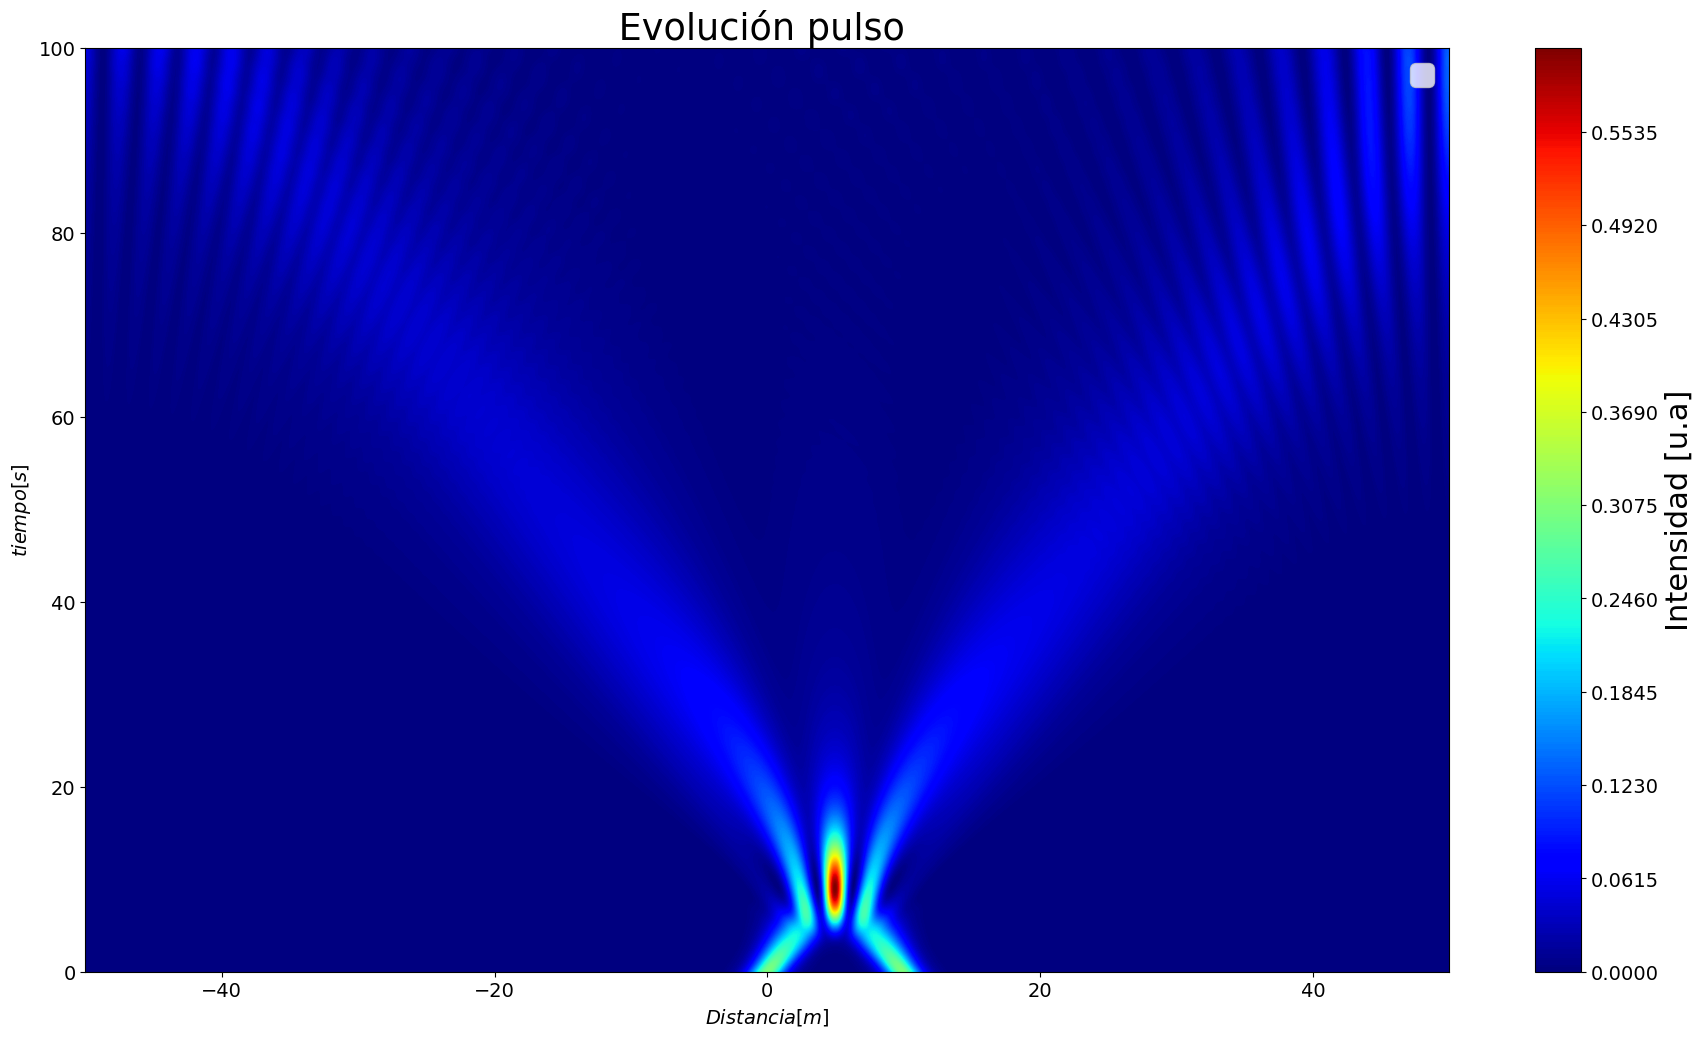

In [81]:
%matplotlib inline
Y=T
X=x[::-1]
X,Y = np.meshgrid(X,Y)
Z2=I3
plt.rcParams['figure.figsize'] = 22, 12 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.rcParams['font.size'] = '22'

font = {'weight' : 'bold',
        'size'   : 14}
plt.figure()#im=plt.contourf(T1, T2, Landa,900,cmap="jet")

plt.title(" Evolución pulso  ")
plt.xlabel("$ Distancia [m]$",fontsize=14)
plt.ylabel("$ tiempo [s]$",fontsize=14)

cs2=plt.contourf(X, Y, Z2,500,cmap="jet")
plt.colorbar(cs2,label="Intensidad [u.a]")

plt.legend()
#plt.savefig("Delta_landa_correc"+str(p))
#c = plt.colorbar()
#fig.colorbar(min(Power),max(Power),


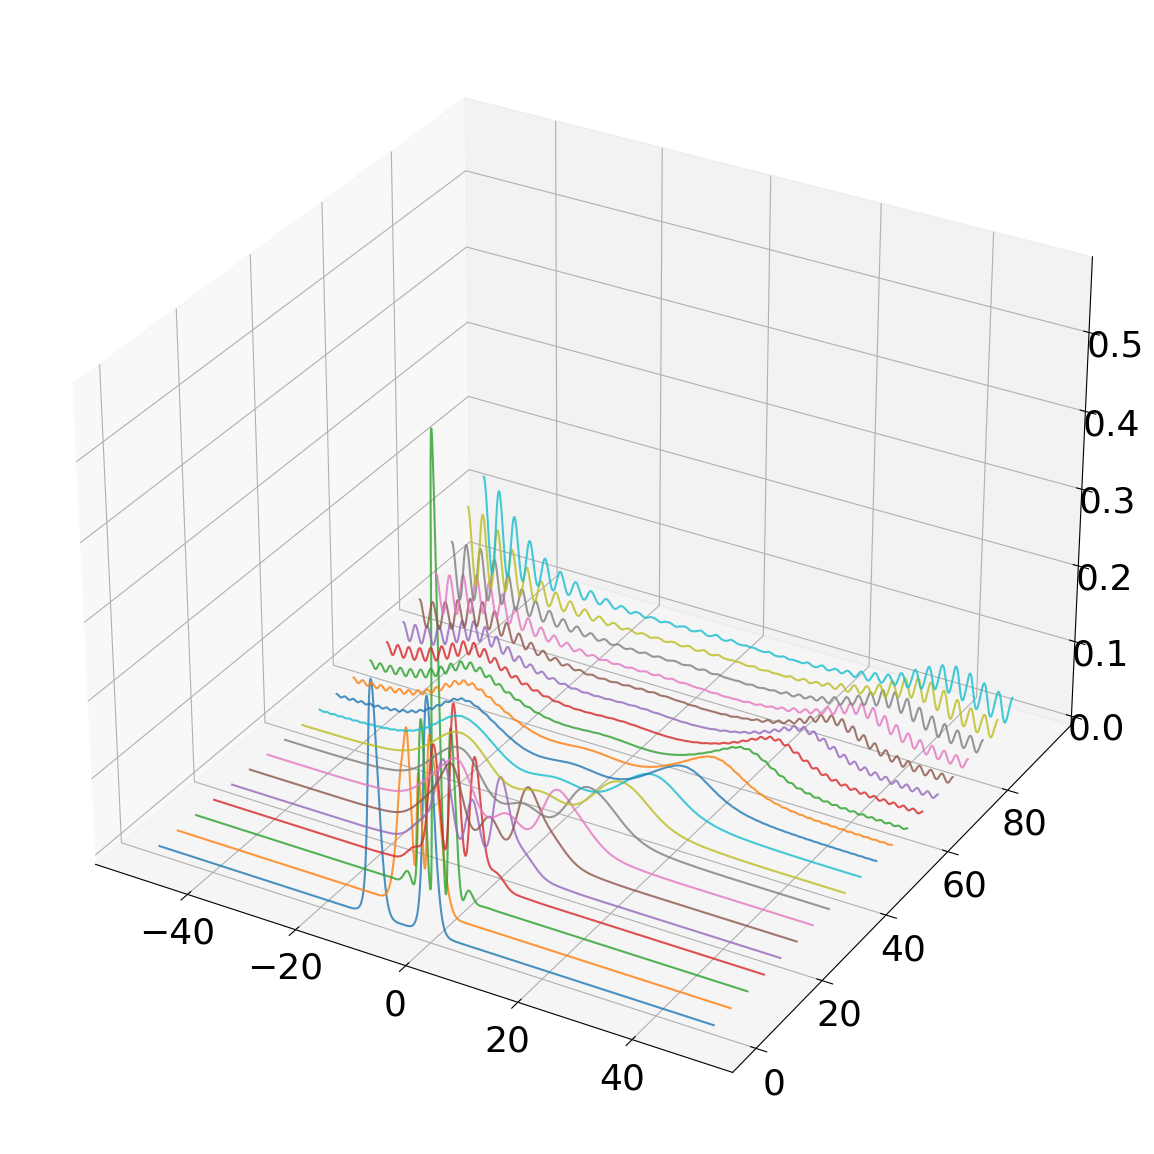

In [80]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=26) 
matplotlib.rc('ytick', labelsize=26) 

font = {'weight' : 'bold',
        'size'   : 24}

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

#fig.suptitle('Horizontally stacked subplots')
for i in range(0,2000,100):
    ax1.plot(x, I3[i], T[i], zdir='y', alpha=0.8)
    fig.tight_layout()

#ax1.set_xlabel("$\phi_{1} [^o]$",fontsize=18)
#ax1.set_ylabel("$\phi_{2} [^o]$",fontsize=18)




In [ ]:
for i in range(0,1,1):
    plt.plot(I3[i])

In [91]:
a = -0.3289575;
c = 1;
beta = 1.42349;
gamma = 0.151745# 2./3;

s=-a-(c**2)/(2*beta)
q=np.sqrt(-(4*s-gamma))
omeguita=2*np.sqrt(-s/(beta))
s_root=1j*np.sqrt(-s)

print(s,"s")
print(s_root, "s_root")
print(q,"q")
print(omeguita,"Omeguita")
print(4*s-gamma,"45-gamma")

-0.022291894094795206 s
0.14930470218581599j s_root
0.4908284592188811 q
0.25028007182390144 Omeguita
-0.24091257637918082 45-gamma


# Simulación 4, solución dispersiva beta=-1,gamma=3


In [31]:
df=pd.read_csv("One Soliton_new_7.csv",skiprows=0,on_bad_lines='skip')


Sol_sim=[]
a=0
    
Sol_sim=[]
    
for index in range(2000):
    #print('Índice de la columna: ', index)
    #print('Contenido de la columna: ', df.iloc[: , index].values)
    array=df.iloc[: , index].values
    Sol_sim.append(array)

Y4=[];X1=[]
for i in range(len(Sol_sim)):
    #print(i)
    
    new=Sol_sim[i]
    Y4.append(np.array(X1,dtype="complex"))
    X1=[]
    #new=new.astype(complex)
    for j in range(len(new)):
        #print(Sol_sim[i][j])
        #print(i,j)
        
        
        a=Sol_sim[i][j]
        a=a.replace("i","j")
        a=a.replace(" ","")
        a=complex(a)
        X1.append(a)

Y4=np.array(Y4[1:len(Y4)],dtype="complex")
I4=np.abs(Y4.T)

In [32]:
len(Y4[0])

2001

In [82]:
%matplotlib inline
a = .2;
c = 1;
beta = 20
gamma = 2/3;
s=-a-(c**2)/(2*beta)
P0=2*a/gamma
t0=np.sqrt(-2*a/beta)
N=2000;M=2000
print(s,"s")
print(-s/(beta),"Omeguita into")
print(4*s-gamma,"45-gamma")
print("Longitud de dispesión",(t0**2)/beta)
print("Longitud no lineal",1/(gamma*P0))
def sech_dispi(x,t):
    s=-a-(c**2)/(2*beta)
    #q=np.sqrt(4*s-gamma)
    #s_root=np.sqrt(s)
    #omeguita=2*np.sqrt(-s/(beta))
    #print(s)
    
    if s<0:
        
        s_root=1j*np.sqrt(-s)
        #print(s_root)
    else:
        s_root=np.sqrt(s)

    if 4*s-gamma<0:
        q=1j*np.sqrt(-(4*s-gamma))
        #print(q)
    else:
        q=np.sqrt(4*s-gamma)

    if (s/(beta))>0:
        omeguita=2j*np.sqrt(s/(beta))
    else:
        omeguita=2*np.sqrt(-s/(beta))

    
    return np.exp(1j*s*t)*1*s_root/(q+1*s_root*(np.cosh(omeguita*x)))


T=np.linspace(0,100,len(Y4[0]))
x=np.linspace(-50,50,len(Y4))
Y_SOL4=[]
for i in range(len(T)):
    Y_SOL4.append(sech_dispi(x,T[i]))
Y_SOL4=np.array(Y_SOL4,dtype="complex")
I_SOL4=np.abs(Y_SOL4)**2
print(len(I4))
print(len(I_SOL4))
print(len(I4[0]))
print(len(I_SOL4[0]))
print(len(x))
print(len(T))


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


-0.225 s
0.01125 Omeguita into
-1.5666666666666667 45-gamma
Longitud de dispesión nan
Longitud no lineal 2.5
2001
2001
1999
1999
1999
2001


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


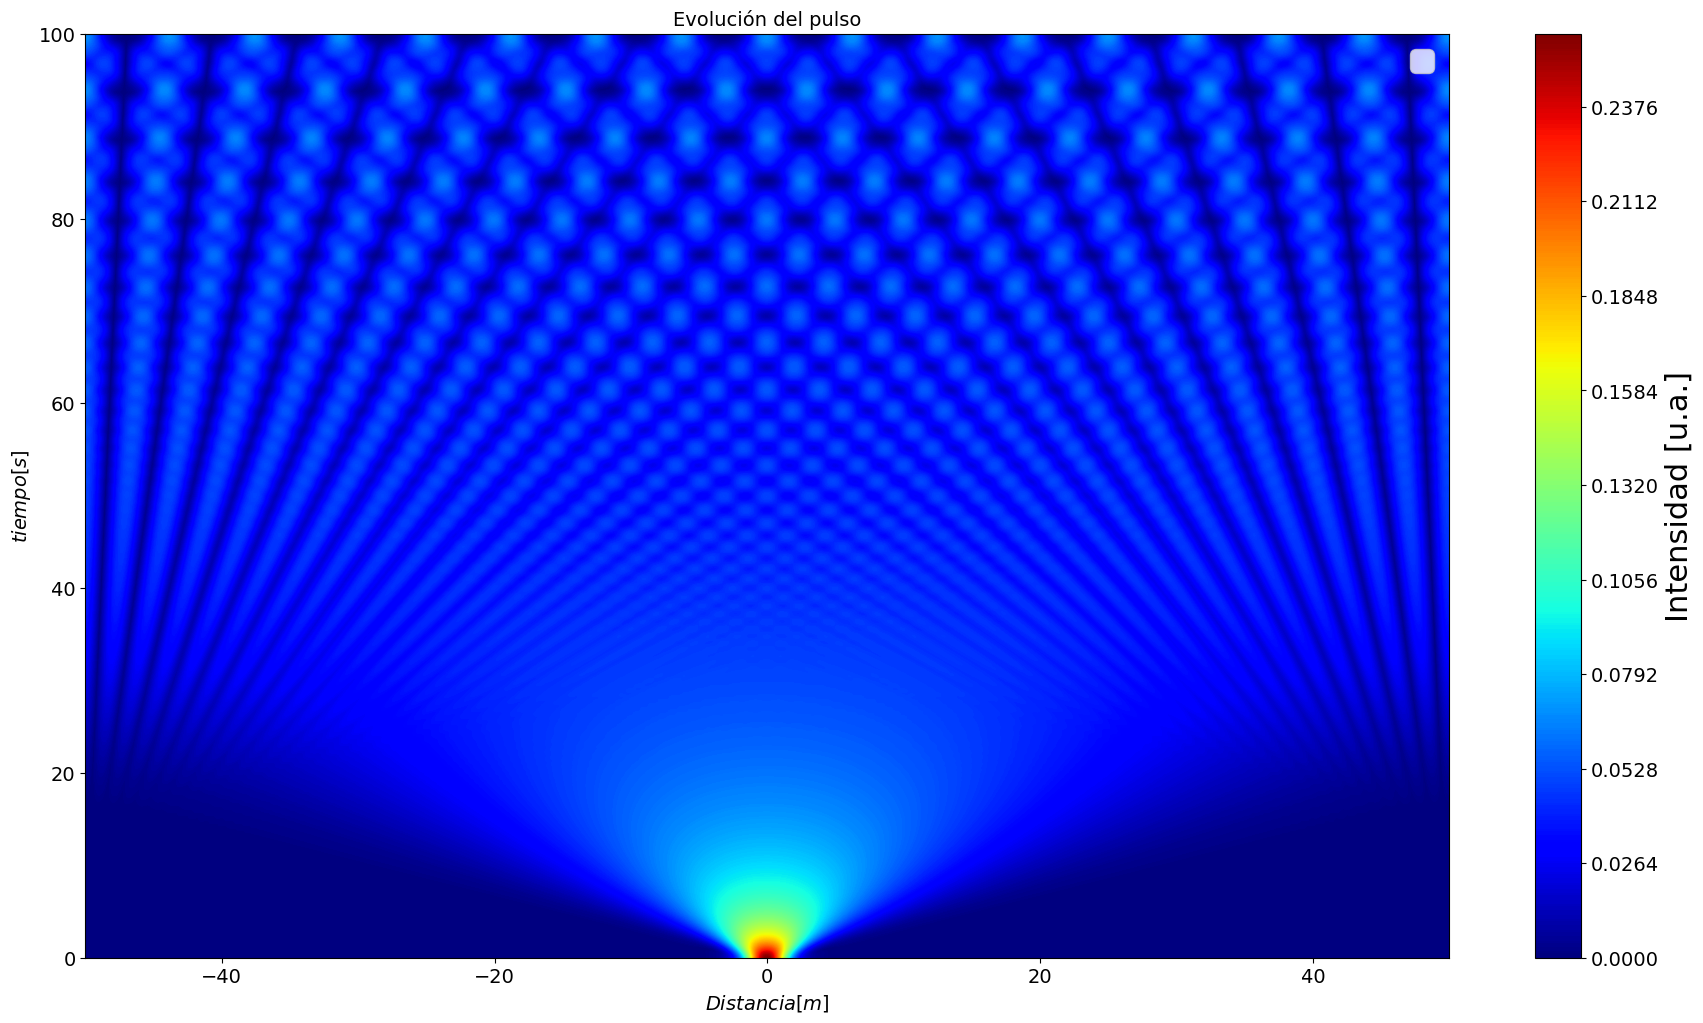

In [88]:
%matplotlib inline
Y=T
X=x[::-1]
X,Y = np.meshgrid(X,Y)
Z2=I4
plt.rcParams['figure.figsize'] = 22, 12 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.rcParams['font.size'] = '22'

font = {'weight' : 'bold',
        'size'   : 14}
plt.figure()#im=plt.contourf(T1, T2, Landa,900,cmap="jet")

plt.title("Evolución del pulso",fontsize=14)
plt.xlabel("$ Distancia [m]$",fontsize=14)
plt.ylabel("$ tiempo [s]$",fontsize=14)

cs2=plt.contourf(X, Y, Z2,500,cmap="jet")
plt.colorbar(cs2,label="Intensidad [u.a.]")

plt.legend()
#plt.savefig("Delta_landa_correc"+str(p))
#c = plt.colorbar()
#fig.colorbar(min(Power),max(Power),


In [89]:
%matplotlib qt
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = {'weight' : 'bold',
        'size'   : 14}

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

#fig.suptitle('Horizontally stacked subplots')
for i in range(0,2000,200):
    ax1.plot(x, 100*(I4[i]-I_SOL4[i])/np.max(I4[i]), T[i], zdir='y', alpha=0.8)
    fig.tight_layout()

ax1.set_xlabel("Distancia [m]",fontsize=18)
ax1.set_ylabel("Tiempo [s]",fontsize=18)
ax1.set_zlabel("Intensidad [ua]",fontsize=18)




Text(0.5, 0, 'Intensidad [ua]')

# Simulacion 5, celda para ingresar alguna solución y graficarla

In [91]:
#name: Acá podría ingresar una solución y graficarla
df=pd.read_csv("Name",skiprows=0,on_bad_lines='skip')


Sol_sim=[]
a=0
    
Sol_sim=[]
    
for index in range(2000):
    #print('Índice de la columna: ', index)
    #print('Contenido de la columna: ', df.iloc[: , index].values)
    array=df.iloc[: , index].values
    Sol_sim.append(array)

Y5=[];X1=[]
for i in range(len(Sol_sim)):
    #print(i)
    
    new=Sol_sim[i]
    Y5.append(np.array(X1,dtype="complex"))
    X1=[]
    #new=new.astype(complex)
    for j in range(len(new)):
        #print(Sol_sim[i][j])
        #print(i,j)
        
        
        a=Sol_sim[i][j]
        a=a.replace("i","j")
        a=a.replace(" ","")
        a=complex(a)
        X1.append(a)

Y5=np.array(Y5[1:len(Y5)],dtype="complex")
I5=np.abs(Y5.T)

In [ ]:
a = .2;
c = 1;
beta = -0.5
gamma = 2./3;
s=-a-(c**2)/(2*beta)
def sech_dispi(x,t):
    s=-a-(c**2)/(2*beta)
    #q=np.sqrt(4*s-gamma)
    #s_root=np.sqrt(s)
    #omeguita=2*np.sqrt(-s/(beta))
    #print(s)
    
    if s<0:
        
        s_root=1j*np.sqrt(-s)
        #print(s_root)
    else:
        s_root=np.sqrt(s)

    if 4*s-gamma<0:
        q=1j*np.sqrt(-(4*s-gamma))
        #print(q)
    else:
        q=np.sqrt(4*s-gamma)

    if (s/(beta))>0:
        omeguita=2j*np.sqrt(s/(beta))
    else:
        omeguita=2*np.sqrt(-s/(beta))

    
    return np.exp(1j*s*t)*1*s_root/(q+1*s_root*(np.cosh(omeguita*x)))

T=np.linspace(0,100,len(I2))
x=np.linspace(-50,50,len(I2[0]))
Y_SOL5=[]
for i in range(len(T)):
    Y_SOL5.append(sech_teorica(x,T[i],1)+sech_teorica(x-30,T[i],-1))
Y_SOL5=np.array(Y_SOL5,dtype="complex")
I_SOL5=np.abs(Y_SOL2)**2

In [ ]:
X,Y = np.meshgrid(x,T)

fig = plt.figure(1,figsize=(8,8))
axes3 = Axes3D(fig)
plt.rcParams['figure.figsize'] = 8, 6 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.rcParams['font.size'] = '22'
#len(Z)*len(Z[2])
# Aparecen los gráficos
c=axes3.plot_surface(X,Y,I5,cmap="jet")
axes3.set_xlabel("Distancia [m]",fontsize=14)
axes3.set_ylabel("Tiempo [s]",fontsize=14)
axes3.set_zlabel("Intensidad [u.a.]",fontsize=14)
fig.colorbar(c)

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=26) 
matplotlib.rc('ytick', labelsize=26) 

font = {'weight' : 'bold',
        'size'   : 24}

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

#fig.suptitle('Horizontally stacked subplots')
for i in range(0,2000,40):
    ax1.plot(x, I5[i], T[i], zdir='y', alpha=0.8)
    fig.tight_layout()

#ax1.set_xlabel("$\phi_{1} [^o]$",fontsize=18)
#ax1.set_ylabel("$\phi_{2} [^o]$",fontsize=18)

#PARA MONCADA

Esta la función que program´en c++ para poder generar las soluciones dispersivas


complex <double> g( double x) {
    double a = .2;
    double c = 1;
    complex <double> q,s_root,omeguita;
    double s=-a-(c*c)/(2*beta0);
    if (s<0){
        
        s_root=1i*sqrt(-s);}
    else
       { s_root=sqrt(s);}

    if (4*s-gamnma<0){
        q=1i*sqrt(-(4*s-gamnma));}
    else
       { q=sqrt(4*s-gamnma);}

    if ((s/(beta0))>0){
        omeguita=2i*sqrt(s/(beta0));}
    else
        {omeguita=2*sqrt(-s/(beta0));}

    return  exp( 1i * (c / beta0) * (x))*s_root/(q+s_root*(cosh(omeguita*(x)))) + s_root/(q+s_root*(cosh(omeguita*(x+10)))) * exp( -1i * (c / beta0) * (x+10));


};